In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
import pickle
% matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
file = open("../../data/features/2019_05_17_features_finally.pickle",'rb')
df = pickle.load(file, encoding='utf-8')
df.columns

Index(['id', 'Datetime', 'text', 'sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Volume_perc', 'Trading_Hour', 'Residual'],
      dtype='object')

In [4]:
df.shape

(746, 29)

In [5]:
print(df.isnull().sum())

id                      0
Datetime                0
text                    0
sentiment               0
subjectivity            0
isreply                 0
year                    0
month                   0
day                     0
date                    0
DayofWeek               0
Weekend                 0
Time                    0
BinaryTrading           0
DayDistance             0
gtrend                  0
CommentSentimental      0
CommentSubjectivity     0
countComment            0
posCommentSum           0
negCommentSum           0
CommentSD               0
posCommentSD            0
negCommentSD            0
negCommentPercent       0
posCommentPercent       0
Volume_perc            27
Trading_Hour           27
Residual               27
dtype: int64


In [6]:
df = df[df['Volume_perc'].isnull() == False]

In [7]:
df.shape

(719, 29)

In [8]:
df

,id,Datetime,text,sentiment,subjectivity,isreply,year,month,day,date,...,posCommentSum,negCommentSum,CommentSD,posCommentSD,negCommentSD,negCommentPercent,posCommentPercent,Volume_perc,Trading_Hour,Residual
27,1112847351595466753,2019-04-01 22:40:00+00:00,that car seemed so advanced when i watched tha...,0.250000,0.300000,1,2019,4,1,2019-04-01,...,5.412311,0.000000,0.292040,0.265866,0.000000,0.000000,0.480000,0.263361,1.0,0.029279
28,1112839897218310144,2019-04-01 22:11:00+00:00,"going forward, all tesla stores will be tiny &...",0.000000,0.500000,1,2019,4,1,2019-04-01,...,20.584905,-4.033257,0.223683,0.241346,0.118763,0.125000,0.315000,0.124610,5.0,0.029990
29,1112123741574586368,2019-03-30 22:45:00+00:00,we’ve been so mired in production & logistics ...,-0.025000,0.225000,0,2019,3,30,2019-03-30,...,181.046184,-36.849299,0.244820,0.238605,0.224317,0.092355,0.304587,0.225978,1.0,-0.020161
30,1112106548363292672,2019-03-30 21:37:00+00:00,tesla semi delivering tesla carspic.twitter.co...,0.000000,0.000000,0,2019,3,30,2019-03-30,...,115.902111,-21.898603,0.253292,0.242533,0.240379,0.081162,0.301603,0.084750,7.0,-0.025826
31,1112036985504317442,2019-03-30 17:00:00+00:00,"amazing work by tesla delivery teams, especial...",0.182292,0.608333,0,2019,3,30,2019-03-30,...,44.390798,-8.188405,0.269115,0.258929,0.184834,0.112150,0.383178,0.137876,5.0,0.048561
32,1111788218142216192,2019-03-30 00:32:00+00:00,retrofits will start when our software is able...,0.295833,0.419792,1,2019,3,30,2019-03-30,...,60.349110,-9.847427,0.229875,0.211034,0.215596,0.106122,0.420408,0.294701,1.0,0.009531
33,1111762533520531456,2019-03-29 22:50:00+00:00,anyone who purchased full self-driving will ge...,0.155000,0.461667,0,2019,3,29,2019-03-29,...,40.492307,-8.223304,0.223112,0.201338,0.215351,0.111421,0.398329,0.065214,6.0,-0.037516
34,1111001632731389952,2019-03-27 20:26:00+00:00,super proud of tesla autopilot team!,0.666667,0.833333,1,2019,3,27,2019-03-27,...,17.803204,-1.025000,0.298376,0.279697,0.086796,0.093023,0.500000,0.090368,7.0,-0.027039
35,1110632394611015681,2019-03-26 19:59:00+00:00,i think so. for sure worth giving it our best ...,0.233333,0.359877,1,2019,3,26,2019-03-26,...,90.909926,-21.583804,0.221554,0.191146,0.223208,0.119952,0.382423,0.299102,1.0,0.039571
36,1110576683411628032,2019-03-26 16:18:00+00:00,hard to appreciate how much tesla autopilot im...,-0.045833,0.370833,1,2019,3,26,2019-03-26,...,43.359616,-7.845460,0.238042,0.190385,0.201954,0.134868,0.476974,0.299102,1.0,0.039571


In [9]:
df.columns

Index(['id', 'Datetime', 'text', 'sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Volume_perc', 'Trading_Hour', 'Residual'],
      dtype='object')

In [10]:
df['Weekend'] = df['Weekend'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 27 to 745
Data columns (total 29 columns):
id                     719 non-null object
Datetime               719 non-null datetime64[ns, UTC]
text                   719 non-null object
sentiment              719 non-null float64
subjectivity           719 non-null float64
isreply                719 non-null int64
year                   719 non-null int64
month                  719 non-null int64
day                    719 non-null int64
date                   719 non-null object
DayofWeek              719 non-null int64
Weekend                719 non-null int64
Time                   719 non-null object
BinaryTrading          719 non-null int64
DayDistance            719 non-null int64
gtrend                 719 non-null int64
CommentSentimental     719 non-null float64
CommentSubjectivity    719 non-null float64
countComment           719 non-null int64
posCommentSum          719 non-null float64
negCommentSum          719

In [12]:
# prepare X and Y

X = df[['sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Trading_Hour']]

Y = df['Residual']

In [15]:
len(X.columns)

24

In [21]:
len(X.corr().columns)

22

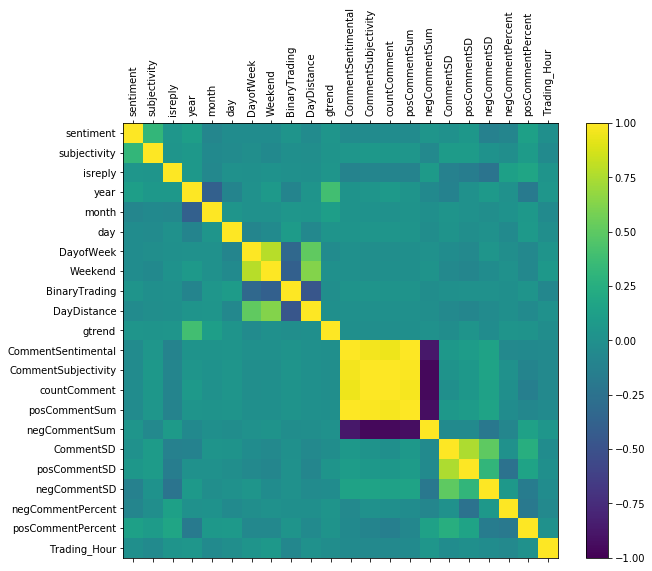

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(X.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.corr().columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.corr().columns)
ax.set_yticklabels(X.corr().columns);

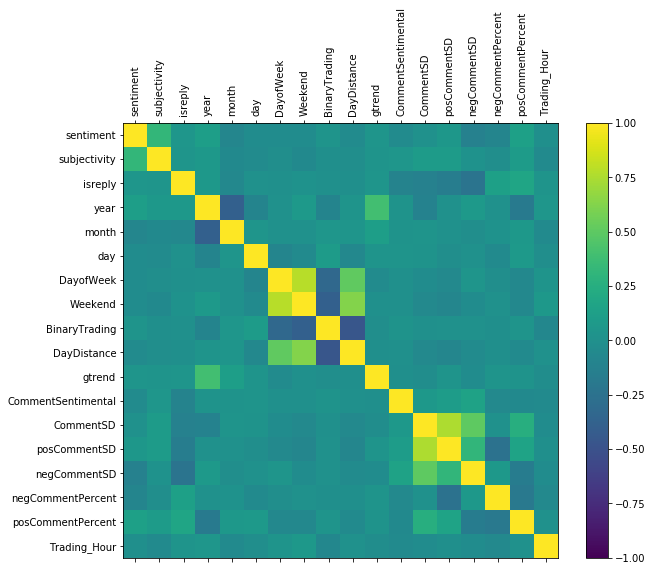

In [32]:
X = df[['sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'DayofWeek', 'Weekend', 
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Trading_Hour']]

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(X.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.corr().columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.corr().columns)
ax.set_yticklabels(X.corr().columns);

In [33]:
num_features = len(X.columns)

In [34]:
num_features

18

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 27 to 745
Data columns (total 29 columns):
id                     719 non-null object
Datetime               719 non-null datetime64[ns, UTC]
text                   719 non-null object
sentiment              719 non-null float64
subjectivity           719 non-null float64
isreply                719 non-null int64
year                   719 non-null int64
month                  719 non-null int64
day                    719 non-null int64
date                   719 non-null object
DayofWeek              719 non-null int64
Weekend                719 non-null int64
Time                   719 non-null object
BinaryTrading          719 non-null int64
DayDistance            719 non-null int64
gtrend                 719 non-null int64
CommentSentimental     719 non-null float64
CommentSubjectivity    719 non-null float64
countComment           719 non-null int64
posCommentSum          719 non-null float64
negCommentSum          719

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(575, 18) (575,)
(144, 18) (144,)


### 1. Linear Regression

In [37]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

print("Linear Reg R^2 training is: {}".format(linear_reg.score(X_train, Y_train)))
print("Linear Reg R^2 testing is: {}".format(linear_reg.score(X_test, Y_test)))
print("Linear Reg Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, linear_reg.predict(X_train)))))
print("Linear Reg Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, linear_reg.predict(X_test)))))

Linear Reg R^2 training is: 0.10467786408969926
Linear Reg R^2 testing is: 0.1340306035376575
Linear Reg Train RMSE is: 0.17140681629681037
Linear Reg Test RMSE is: 0.16434661727175726


### 2a. Simple Random Forest

In [38]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)     # instantiate
random_forest.fit(X_train, Y_train)                         # fit

print("Random Forest R^2 training is: {}".format(random_forest.score(X_train, Y_train)))                
print("Random Forest R^2 testing is: {}".format(random_forest.score(X_test, Y_test)))   
print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, random_forest.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, random_forest.predict(X_test)))))

Random Forest R^2 training is: 0.8829633780204305
Random Forest R^2 testing is: 0.2921776694041951
Random Forest Train RMSE is: 0.06197254286105843
Random Forest Test RMSE is: 0.14858385682681385


### 2b. Random Forest with Cross Validation

In [40]:
rf_cv = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=np.sqrt(num_features), random_state=10)

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 550, num = 6)]
max_features = [int(x) for x in np.linspace(4, 16, num = 6)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]

# create the hyperparameter grid
rf_param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth}

print(rf_param_grid)

{'n_estimators': [50, 150, 250, 350, 450, 550], 'max_features': [4, 6, 8, 11, 13, 16], 'max_depth': [10, 20, 30, 40, 50]}


In [42]:
rf_grid = GridSearchCV(estimator = rf_cv, 
                       param_grid = rf_param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

# fit the grid search model
rf_grid.fit(X_train, Y_train)

# best hyperparameters
rf_grid.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... max_depth=10, max_features=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=150 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=150, total=   0.4s
[CV] max_depth=10, max_features=4, n_estimators=150 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=150, total=   0.4s
[CV] max_depth=10, max_features=4, n_estimators=150 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=150, total=   0.5s
[CV] max_depth=10, max_features=4, n_estimators=150 ..................
[CV] .

[CV] ... max_depth=10, max_features=6, n_estimators=550, total=   1.8s
[CV] max_depth=10, max_features=8, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=8, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=8, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=8, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=8, n_estimators=50 ...................
[CV] .... max_depth=10, max_features=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=8, n_estimators=150 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=150, total=   0.5s
[CV] max_depth=10, max_features=8, n_estimators=150 ..................
[CV] .

[CV] .. max_depth=10, max_features=11, n_estimators=550, total=   2.3s
[CV] max_depth=10, max_features=11, n_estimators=550 .................
[CV] .. max_depth=10, max_features=11, n_estimators=550, total=   2.3s
[CV] max_depth=10, max_features=11, n_estimators=550 .................
[CV] .. max_depth=10, max_features=11, n_estimators=550, total=   2.3s
[CV] max_depth=10, max_features=13, n_estimators=50 ..................
[CV] ... max_depth=10, max_features=13, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=13, n_estimators=50 ..................
[CV] ... max_depth=10, max_features=13, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=13, n_estimators=50 ..................
[CV] ... max_depth=10, max_features=13, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=13, n_estimators=50 ..................
[CV] ... max_depth=10, max_features=13, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=13, n_estimators=50 ..................
[CV] .

[CV] .. max_depth=10, max_features=16, n_estimators=550, total=   3.1s
[CV] max_depth=10, max_features=16, n_estimators=550 .................
[CV] .. max_depth=10, max_features=16, n_estimators=550, total=   2.9s
[CV] max_depth=10, max_features=16, n_estimators=550 .................
[CV] .. max_depth=10, max_features=16, n_estimators=550, total=   2.9s
[CV] max_depth=10, max_features=16, n_estimators=550 .................
[CV] .. max_depth=10, max_features=16, n_estimators=550, total=   2.9s
[CV] max_depth=10, max_features=16, n_estimators=550 .................
[CV] .. max_depth=10, max_features=16, n_estimators=550, total=   2.9s
[CV] max_depth=20, max_features=4, n_estimators=50 ...................
[CV] .... max_depth=20, max_features=4, n_estimators=50, total=   0.1s
[CV] max_depth=20, max_features=4, n_estimators=50 ...................
[CV] .... max_depth=20, max_features=4, n_estimators=50, total=   0.1s
[CV] max_depth=20, max_features=4, n_estimators=50 ...................
[CV] .

[CV] ... max_depth=20, max_features=6, n_estimators=450, total=   1.5s
[CV] max_depth=20, max_features=6, n_estimators=450 ..................
[CV] ... max_depth=20, max_features=6, n_estimators=450, total=   1.5s
[CV] max_depth=20, max_features=6, n_estimators=550 ..................
[CV] ... max_depth=20, max_features=6, n_estimators=550, total=   1.8s
[CV] max_depth=20, max_features=6, n_estimators=550 ..................
[CV] ... max_depth=20, max_features=6, n_estimators=550, total=   1.8s
[CV] max_depth=20, max_features=6, n_estimators=550 ..................
[CV] ... max_depth=20, max_features=6, n_estimators=550, total=   1.9s
[CV] max_depth=20, max_features=6, n_estimators=550 ..................
[CV] ... max_depth=20, max_features=6, n_estimators=550, total=   2.0s
[CV] max_depth=20, max_features=6, n_estimators=550 ..................
[CV] ... max_depth=20, max_features=6, n_estimators=550, total=   1.9s
[CV] max_depth=20, max_features=8, n_estimators=50 ...................
[CV] .

[CV] .. max_depth=20, max_features=11, n_estimators=450, total=   2.1s
[CV] max_depth=20, max_features=11, n_estimators=450 .................
[CV] .. max_depth=20, max_features=11, n_estimators=450, total=   2.3s
[CV] max_depth=20, max_features=11, n_estimators=450 .................
[CV] .. max_depth=20, max_features=11, n_estimators=450, total=   2.2s
[CV] max_depth=20, max_features=11, n_estimators=450 .................
[CV] .. max_depth=20, max_features=11, n_estimators=450, total=   2.2s
[CV] max_depth=20, max_features=11, n_estimators=550 .................
[CV] .. max_depth=20, max_features=11, n_estimators=550, total=   2.7s
[CV] max_depth=20, max_features=11, n_estimators=550 .................
[CV] .. max_depth=20, max_features=11, n_estimators=550, total=   2.6s
[CV] max_depth=20, max_features=11, n_estimators=550 .................
[CV] .. max_depth=20, max_features=11, n_estimators=550, total=   2.7s
[CV] max_depth=20, max_features=11, n_estimators=550 .................
[CV] .

[CV] .. max_depth=20, max_features=16, n_estimators=350, total=   2.3s
[CV] max_depth=20, max_features=16, n_estimators=450 .................
[CV] .. max_depth=20, max_features=16, n_estimators=450, total=   2.9s
[CV] max_depth=20, max_features=16, n_estimators=450 .................
[CV] .. max_depth=20, max_features=16, n_estimators=450, total=   2.9s
[CV] max_depth=20, max_features=16, n_estimators=450 .................
[CV] .. max_depth=20, max_features=16, n_estimators=450, total=   2.9s
[CV] max_depth=20, max_features=16, n_estimators=450 .................
[CV] .. max_depth=20, max_features=16, n_estimators=450, total=   2.8s
[CV] max_depth=20, max_features=16, n_estimators=450 .................
[CV] .. max_depth=20, max_features=16, n_estimators=450, total=   2.9s
[CV] max_depth=20, max_features=16, n_estimators=550 .................
[CV] .. max_depth=20, max_features=16, n_estimators=550, total=   3.5s
[CV] max_depth=20, max_features=16, n_estimators=550 .................
[CV] .

[CV] ... max_depth=30, max_features=6, n_estimators=350, total=   1.2s
[CV] max_depth=30, max_features=6, n_estimators=350 ..................
[CV] ... max_depth=30, max_features=6, n_estimators=350, total=   1.2s
[CV] max_depth=30, max_features=6, n_estimators=350 ..................
[CV] ... max_depth=30, max_features=6, n_estimators=350, total=   1.2s
[CV] max_depth=30, max_features=6, n_estimators=450 ..................
[CV] ... max_depth=30, max_features=6, n_estimators=450, total=   1.6s
[CV] max_depth=30, max_features=6, n_estimators=450 ..................
[CV] ... max_depth=30, max_features=6, n_estimators=450, total=   1.5s
[CV] max_depth=30, max_features=6, n_estimators=450 ..................
[CV] ... max_depth=30, max_features=6, n_estimators=450, total=   1.6s
[CV] max_depth=30, max_features=6, n_estimators=450 ..................
[CV] ... max_depth=30, max_features=6, n_estimators=450, total=   1.6s
[CV] max_depth=30, max_features=6, n_estimators=450 ..................
[CV] .

[CV] .. max_depth=30, max_features=11, n_estimators=350, total=   1.8s
[CV] max_depth=30, max_features=11, n_estimators=350 .................
[CV] .. max_depth=30, max_features=11, n_estimators=350, total=   1.7s
[CV] max_depth=30, max_features=11, n_estimators=350 .................
[CV] .. max_depth=30, max_features=11, n_estimators=350, total=   1.7s
[CV] max_depth=30, max_features=11, n_estimators=350 .................
[CV] .. max_depth=30, max_features=11, n_estimators=350, total=   1.7s
[CV] max_depth=30, max_features=11, n_estimators=350 .................
[CV] .. max_depth=30, max_features=11, n_estimators=350, total=   1.8s
[CV] max_depth=30, max_features=11, n_estimators=450 .................
[CV] .. max_depth=30, max_features=11, n_estimators=450, total=   2.3s
[CV] max_depth=30, max_features=11, n_estimators=450 .................
[CV] .. max_depth=30, max_features=11, n_estimators=450, total=   2.2s
[CV] max_depth=30, max_features=11, n_estimators=450 .................
[CV] .

[CV] .. max_depth=30, max_features=16, n_estimators=250, total=   1.5s
[CV] max_depth=30, max_features=16, n_estimators=250 .................
[CV] .. max_depth=30, max_features=16, n_estimators=250, total=   1.6s
[CV] max_depth=30, max_features=16, n_estimators=350 .................
[CV] .. max_depth=30, max_features=16, n_estimators=350, total=   2.2s
[CV] max_depth=30, max_features=16, n_estimators=350 .................
[CV] .. max_depth=30, max_features=16, n_estimators=350, total=   2.3s
[CV] max_depth=30, max_features=16, n_estimators=350 .................
[CV] .. max_depth=30, max_features=16, n_estimators=350, total=   2.3s
[CV] max_depth=30, max_features=16, n_estimators=350 .................
[CV] .. max_depth=30, max_features=16, n_estimators=350, total=   2.2s
[CV] max_depth=30, max_features=16, n_estimators=350 .................
[CV] .. max_depth=30, max_features=16, n_estimators=350, total=   2.3s
[CV] max_depth=30, max_features=16, n_estimators=450 .................
[CV] .

[CV] ... max_depth=40, max_features=6, n_estimators=250, total=   0.9s
[CV] max_depth=40, max_features=6, n_estimators=250 ..................
[CV] ... max_depth=40, max_features=6, n_estimators=250, total=   0.9s
[CV] max_depth=40, max_features=6, n_estimators=250 ..................
[CV] ... max_depth=40, max_features=6, n_estimators=250, total=   0.9s
[CV] max_depth=40, max_features=6, n_estimators=250 ..................
[CV] ... max_depth=40, max_features=6, n_estimators=250, total=   0.9s
[CV] max_depth=40, max_features=6, n_estimators=350 ..................
[CV] ... max_depth=40, max_features=6, n_estimators=350, total=   1.2s
[CV] max_depth=40, max_features=6, n_estimators=350 ..................
[CV] ... max_depth=40, max_features=6, n_estimators=350, total=   1.2s
[CV] max_depth=40, max_features=6, n_estimators=350 ..................
[CV] ... max_depth=40, max_features=6, n_estimators=350, total=   1.2s
[CV] max_depth=40, max_features=6, n_estimators=350 ..................
[CV] .

[CV] .. max_depth=40, max_features=11, n_estimators=150, total=   0.7s
[CV] max_depth=40, max_features=11, n_estimators=250 .................
[CV] .. max_depth=40, max_features=11, n_estimators=250, total=   1.3s
[CV] max_depth=40, max_features=11, n_estimators=250 .................
[CV] .. max_depth=40, max_features=11, n_estimators=250, total=   0.8s
[CV] max_depth=40, max_features=11, n_estimators=250 .................
[CV] .. max_depth=40, max_features=11, n_estimators=250, total=   0.6s
[CV] max_depth=40, max_features=11, n_estimators=250 .................
[CV] .. max_depth=40, max_features=11, n_estimators=250, total=   0.6s
[CV] max_depth=40, max_features=11, n_estimators=250 .................
[CV] .. max_depth=40, max_features=11, n_estimators=250, total=   0.6s
[CV] max_depth=40, max_features=11, n_estimators=350 .................
[CV] .. max_depth=40, max_features=11, n_estimators=350, total=   0.8s
[CV] max_depth=40, max_features=11, n_estimators=350 .................
[CV] .

[CV] .. max_depth=40, max_features=16, n_estimators=150, total=   0.5s
[CV] max_depth=40, max_features=16, n_estimators=150 .................
[CV] .. max_depth=40, max_features=16, n_estimators=150, total=   0.5s
[CV] max_depth=40, max_features=16, n_estimators=150 .................
[CV] .. max_depth=40, max_features=16, n_estimators=150, total=   0.5s
[CV] max_depth=40, max_features=16, n_estimators=250 .................
[CV] .. max_depth=40, max_features=16, n_estimators=250, total=   0.8s
[CV] max_depth=40, max_features=16, n_estimators=250 .................
[CV] .. max_depth=40, max_features=16, n_estimators=250, total=   0.7s
[CV] max_depth=40, max_features=16, n_estimators=250 .................
[CV] .. max_depth=40, max_features=16, n_estimators=250, total=   0.8s
[CV] max_depth=40, max_features=16, n_estimators=250 .................
[CV] .. max_depth=40, max_features=16, n_estimators=250, total=   0.7s
[CV] max_depth=40, max_features=16, n_estimators=250 .................
[CV] .

[CV] ... max_depth=50, max_features=6, n_estimators=150, total=   0.3s
[CV] max_depth=50, max_features=6, n_estimators=150 ..................
[CV] ... max_depth=50, max_features=6, n_estimators=150, total=   0.2s
[CV] max_depth=50, max_features=6, n_estimators=150 ..................
[CV] ... max_depth=50, max_features=6, n_estimators=150, total=   0.3s
[CV] max_depth=50, max_features=6, n_estimators=150 ..................
[CV] ... max_depth=50, max_features=6, n_estimators=150, total=   0.2s
[CV] max_depth=50, max_features=6, n_estimators=150 ..................
[CV] ... max_depth=50, max_features=6, n_estimators=150, total=   0.3s
[CV] max_depth=50, max_features=6, n_estimators=250 ..................
[CV] ... max_depth=50, max_features=6, n_estimators=250, total=   0.4s
[CV] max_depth=50, max_features=6, n_estimators=250 ..................
[CV] ... max_depth=50, max_features=6, n_estimators=250, total=   0.4s
[CV] max_depth=50, max_features=6, n_estimators=250 ..................
[CV] .

[CV] ... max_depth=50, max_features=11, n_estimators=50, total=   0.1s
[CV] max_depth=50, max_features=11, n_estimators=50 ..................
[CV] ... max_depth=50, max_features=11, n_estimators=50, total=   0.1s
[CV] max_depth=50, max_features=11, n_estimators=150 .................
[CV] .. max_depth=50, max_features=11, n_estimators=150, total=   0.4s
[CV] max_depth=50, max_features=11, n_estimators=150 .................
[CV] .. max_depth=50, max_features=11, n_estimators=150, total=   0.4s
[CV] max_depth=50, max_features=11, n_estimators=150 .................
[CV] .. max_depth=50, max_features=11, n_estimators=150, total=   0.4s
[CV] max_depth=50, max_features=11, n_estimators=150 .................
[CV] .. max_depth=50, max_features=11, n_estimators=150, total=   0.4s
[CV] max_depth=50, max_features=11, n_estimators=150 .................
[CV] .. max_depth=50, max_features=11, n_estimators=150, total=   0.4s
[CV] max_depth=50, max_features=11, n_estimators=250 .................
[CV] .

[CV] ... max_depth=50, max_features=16, n_estimators=50, total=   0.2s
[CV] max_depth=50, max_features=16, n_estimators=50 ..................
[CV] ... max_depth=50, max_features=16, n_estimators=50, total=   0.2s
[CV] max_depth=50, max_features=16, n_estimators=50 ..................
[CV] ... max_depth=50, max_features=16, n_estimators=50, total=   0.2s
[CV] max_depth=50, max_features=16, n_estimators=50 ..................
[CV] ... max_depth=50, max_features=16, n_estimators=50, total=   0.2s
[CV] max_depth=50, max_features=16, n_estimators=150 .................
[CV] .. max_depth=50, max_features=16, n_estimators=150, total=   0.5s
[CV] max_depth=50, max_features=16, n_estimators=150 .................
[CV] .. max_depth=50, max_features=16, n_estimators=150, total=   0.5s
[CV] max_depth=50, max_features=16, n_estimators=150 .................
[CV] .. max_depth=50, max_features=16, n_estimators=150, total=   0.5s
[CV] max_depth=50, max_features=16, n_estimators=150 .................
[CV] .

[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 17.3min finished


{'max_depth': 20, 'max_features': 11, 'n_estimators': 150}

In [43]:
rf_grid.best_params_

{'max_depth': 20, 'max_features': 11, 'n_estimators': 150}

In [ ]:
#rf_grid.cv_results_

In [44]:
# use optimal hyperparameters
rf_cv = RandomForestRegressor(n_estimators=150, max_depth=20, max_features=11, random_state=10)
rf_cv.fit(X_train, Y_train)                         # fit

print("Random Forest R^2 training is: {}".format(rf_cv.score(X_train, Y_train)))                
print("Random Forest R^2 testing is: {}".format(rf_cv.score(X_test, Y_test)))   
print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, rf_cv.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, rf_cv.predict(X_test)))))

Random Forest R^2 training is: 0.8867621911465999
Random Forest R^2 testing is: 0.304319111562386
Random Forest Train RMSE is: 0.06095848373869489
Random Forest Test RMSE is: 0.14730399781441458


### Feature Importance

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(rf_cv.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

y_pos = np.arange(len(X_train.columns))
plt.barh(y_pos, feature_importances.importance, align='center', alpha=0.5)
plt.yticks(y_pos, X_train.columns)
plt.title('CV Random Forest Feature Importance')
plt.show()

### 3. Xtreme Gradient Boosting

Parameter Reference: https://www.datacamp.com/community/tutorials/xgboost-in-python

Default Hyperparams:  
 - XGB R^2 training is: 0.8028077538258795
 - XGB R^2 testing is: 0.47509945124461983
 - XGB Train RMSE is: 0.05406777487449581
 - XGB Test RMSE is: 0.09262375056600759

In [ ]:
xgb = XGBRegressor(objective ='reg:linear')

xgb.fit(X_train, Y_train)  

In [ ]:
xgb

In [ ]:
print("XGB R^2 training is: {}".format(xgb.score(X_train, Y_train)))                
print("XGB R^2 testing is: {}".format(xgb.score(X_test, Y_test)))  
print("XGB Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, xgb.predict(X_train)))))
print("XGB Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, xgb.predict(X_test)))))

In [ ]:
#rf_cv = RandomForestRegressor(n_estimators=50, max_depth=10, max_features=np.sqrt(num_features), random_state=10)

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 550, num = 6)]
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
learning_rates = [0.1, 0.2, 0.3]
colsample_bytrees = [0.2, 0.4, 0.6, 0.8, 1.0]
alphas = [int(x) for x in np.linspace(0, 30, num = 3)]
# create the hyperparameter grid
xgb_param_grid = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                  'learning_rates': learning_rates,
                  'colsample_bytrees': colsample_bytrees,
                  'alphas':alphas}

print(xgb_param_grid)

In [ ]:
xgb_grid = GridSearchCV(estimator = xgb_cv, 
                       param_grid = xgb_param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

# fit the grid search model
xgb_grid.fit(X_train, Y_train)

# best hyperparameters
xgb_grid.best_params_

In [ ]:
# best hyperparameters
xgb_grid.best_params_

In [ ]:
xgb_cv = XGBRegressor(objective ='reg:linear', 
                   colsample_bytree = 0.4, 
                   learning_rate = 0.1,
                   max_depth = 10, 
                   alpha = 0, 
                   n_estimators = 50)

xgb_cv.fit(X_train, Y_train)

In [ ]:
print("XGB R^2 training is: {}".format(xgb_cv.score(X_train, Y_train)))                
print("XGB R^2 testing is: {}".format(xgb_cv.score(X_test, Y_test)))  
print("XGB Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, xgb_cv.predict(X_train)))))
print("XGB Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, xgb_cv.predict(X_test)))))

In [ ]:
modellist = [linear_reg, random_forest, rf_cv, xgb]
modelname = ['log','rf','cv_rf','xgb']  

n = 500
bootstrap = pd.DataFrame(columns=['size','model','mean','sd','CI','LB','UB'])
err = pd.DataFrame(columns=['size','model','mse'])
errors   = np.zeros((n, len(modellist)))

for b in range(0,n):
    for i,model in enumerate(modellist):
        index = np.random.choice(list(range(0,len(X_test))),len(X_test), replace=True)
        errors[b,i] = r2_score(Y_test.iloc[index], model.predict(X_test.iloc[index]))
        err = err.append(pd.DataFrame([{'size': n, 'model' : modelname[i],'MSE' : errors[b,i]  }])) 

bootstrapres = pd.DataFrame({'size': n, 'model' : modelname,'mean' : errors.mean(axis=0) ,'sd' : np.std(errors, axis=0)})
#     print(bootstrapres)
bootstrapres['CI'] = [ 1.96* b[3] for _,b in bootstrapres.iterrows()]
bootstrapres['LB'] = [b[2] - 1.96* b[3] for _,b in bootstrapres.iterrows()]
bootstrapres['UB'] = [b[2] + 1.96* b[3] for _,b in bootstrapres.iterrows()]

bootstrap = bootstrap.append(bootstrapres) 

In [ ]:
# Test R^2 bootstrap 95% confidence interval
bootstrap

In [ ]:
modellist = [linear_reg, random_forest, rf_cv, xgb]
modelname = ['log','rf','cv_rf','xgb'] 

n = 500
bootstrap = pd.DataFrame(columns=['size','model','mean','sd','CI','LB','UB'])
err = pd.DataFrame(columns=['size','model','mse'])
errors   = np.zeros((n, len(modellist)))

for b in range(0,n):
    for i,model in enumerate(modellist):
        index = np.random.choice(list(range(0,len(X_test))),len(X_test), replace=True)
        errors[b,i] = np.sqrt(mean_squared_error(Y_test.iloc[index], model.predict(X_test.iloc[index])))
        err = err.append(pd.DataFrame([{'size': n, 'model' : modelname[i],'MSE' : errors[b,i]  }])) 

bootstrapres = pd.DataFrame({'size': n, 'model' : modelname,'mean' : errors.mean(axis=0) ,'sd' : np.std(errors, axis=0)})
#     print(bootstrapres)
bootstrapres['CI'] = [ 1.96* b[3] for _,b in bootstrapres.iterrows()]
bootstrapres['LB'] = [b[2] - 1.96* b[3] for _,b in bootstrapres.iterrows()]
bootstrapres['UB'] = [b[2] + 1.96* b[3] for _,b in bootstrapres.iterrows()]

bootstrap = bootstrap.append(bootstrapres) 

In [ ]:
# RMSE bootstrap 95% confidence interval
bootstrap

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# print(bootstrap)

# plt.figure(figsize = (8,5))
# ax = sns.lineplot(x="size", y="MSE", hue="model",ci='sd', data=err)
# ax.set_ylim(0,1)
## ax.fill_between(bootstrap.size, bootstrap.LB, bootstrap.UB, color='#888888', alpha=0.2)